# ggplot2

## Getting started with __ggplot2__

__ggplot2__ is a system for declaratively creating graphics, based on The Grammar of Graphics. You provide the data, tell ggplot2 how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details.

To use __ggplot2__ you first have to install the package.

### <u>Exercise 1</u> 

Use the __install.packages__ function to install __ggplot2__.

In [1]:
install.packages("ggplot2")

Installing package into ‘/home/grosedj/R-packages’
(as ‘lib’ is unspecified)



### <u>Example 1 - Simple line plot</u>

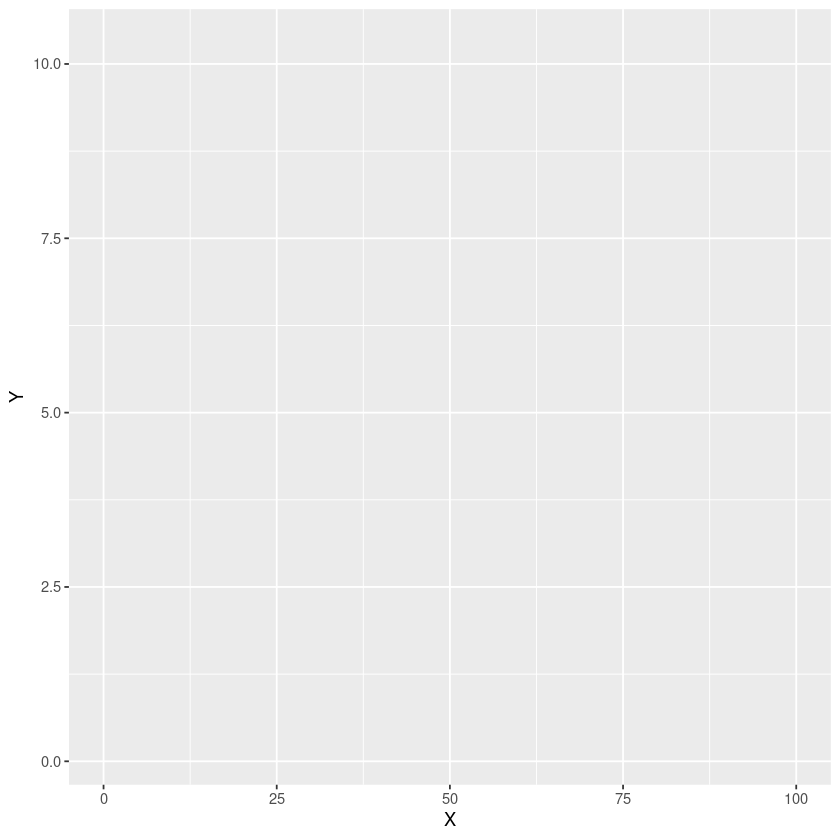

In [2]:
# load the package
library(ggplot2)

# generate some data
X<-seq(0,100,1)
Y<-cumsum(rnorm(101))
# ggplot likes data frames
df<-data.frame(X,Y)

# create a plot
p <- ggplot(df,aes(x=X,y=Y))

print(p)

All this has done is create a plot with some data and specified an __aesthetic__ using __aes__. In this case, the __aesthetic__ associates the x axis with the X data and the y axis with the Y data. The plot exists and can be displayed. Notice that the plot is assigned to a variable. This is useful because the plot can now be modified through the variable (many plotting facilities do not support this) and thus allows you to program with plots.

Notice also that to display the plot you can use the __print__ function. 

Features are added to the plot using __layers__. A plot can have many layers.

### <u>Example 2</u> - Add some points

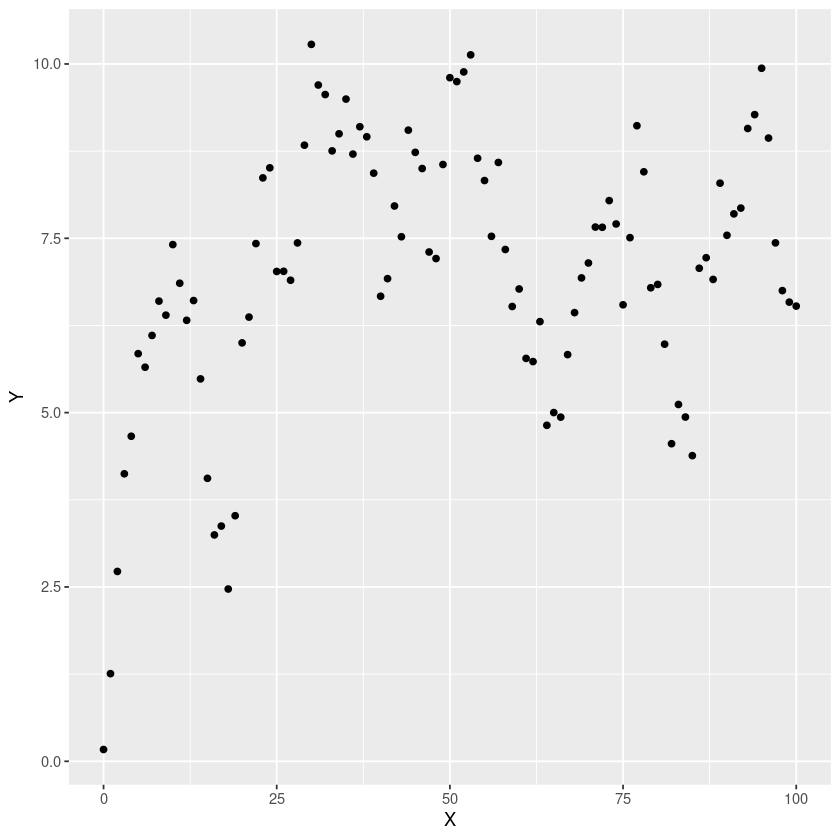

In [3]:
# add a layer
p1 <- p + geom_point()
print(p1)

### <u>Example 3</u> - Add some lines

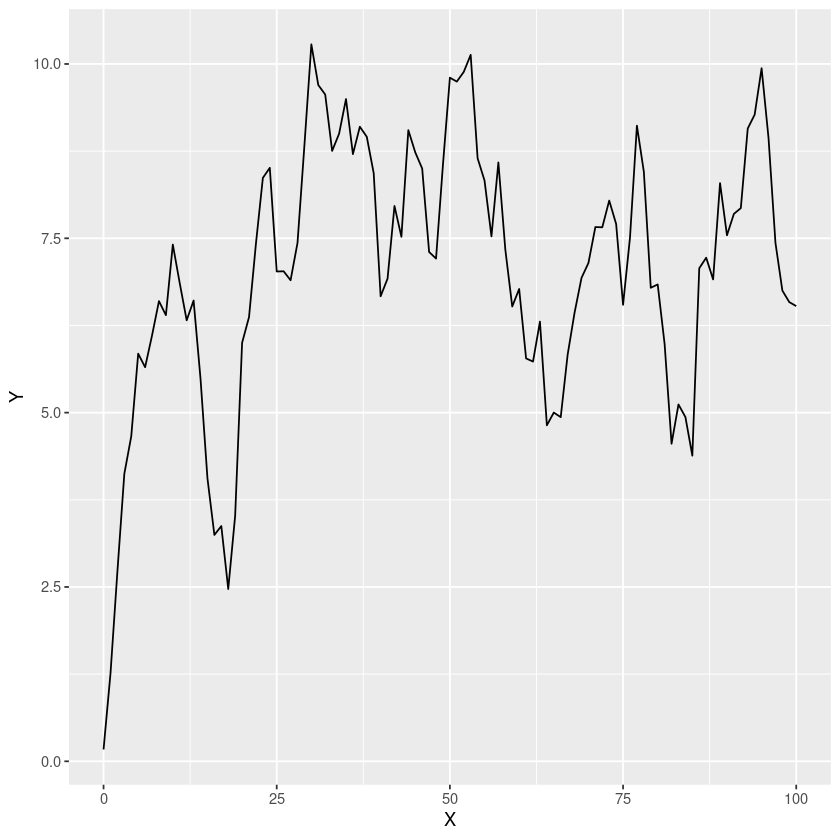

In [4]:
p2 <- p + geom_line()
print(p2)

### <u>Exercise 2</u> 

Create a plot with both points and lines.

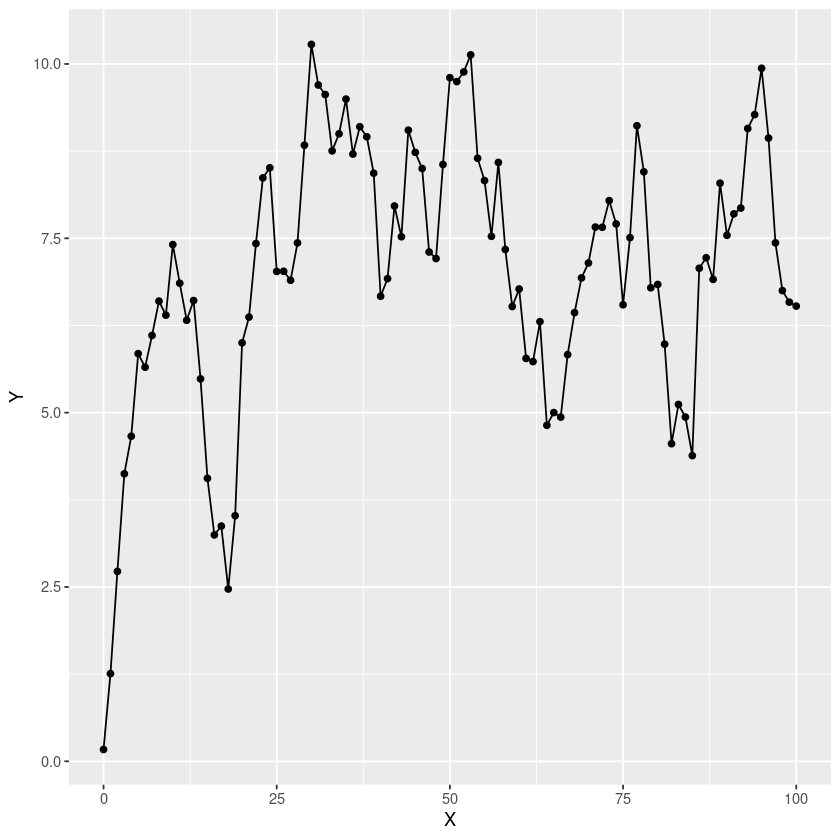

In [5]:
p3 <- p + geom_line() + geom_point()
print(p3)

## Customising appearance

Each layer can be customised in a way appropriate for that layer.

### <u>Example 4</u> - Customise the lines

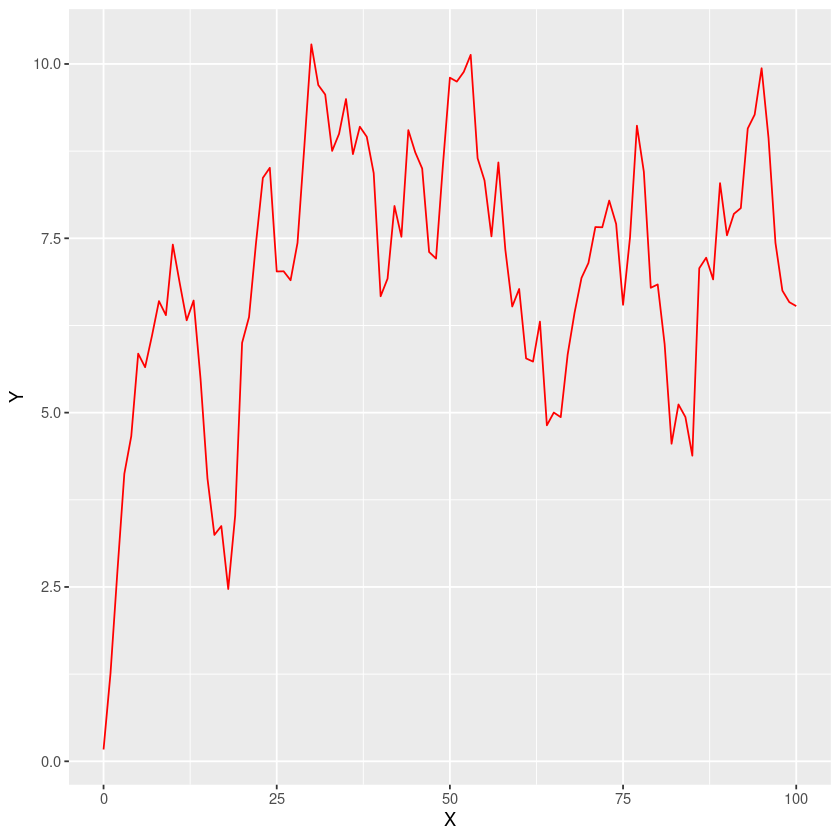

In [6]:
p2 <- p + geom_line(color="red")
print(p2)

### <u>Exercise 3</u>

Experiment with the following code to change the appearance of the plot.

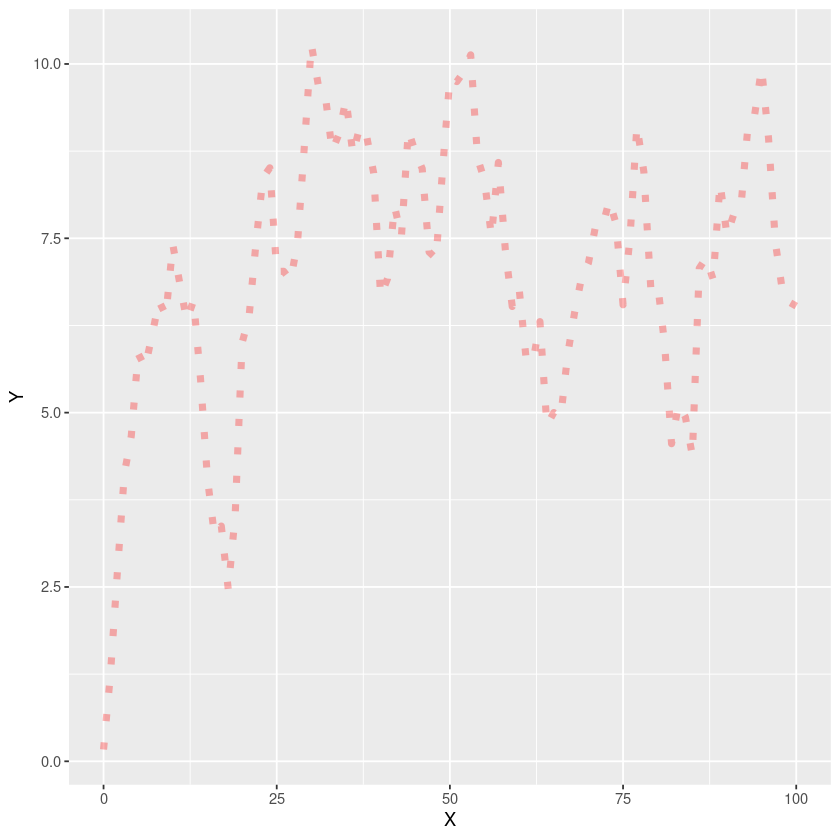

In [7]:
p2 <- p + geom_line(color="red",size=2,alpha=0.3,linetype=3)
print(p2)

## Themes

The "style" of a plot can be modified and controlled through the use of themes. 

### <u>Example 4</u> - A black and white theme.

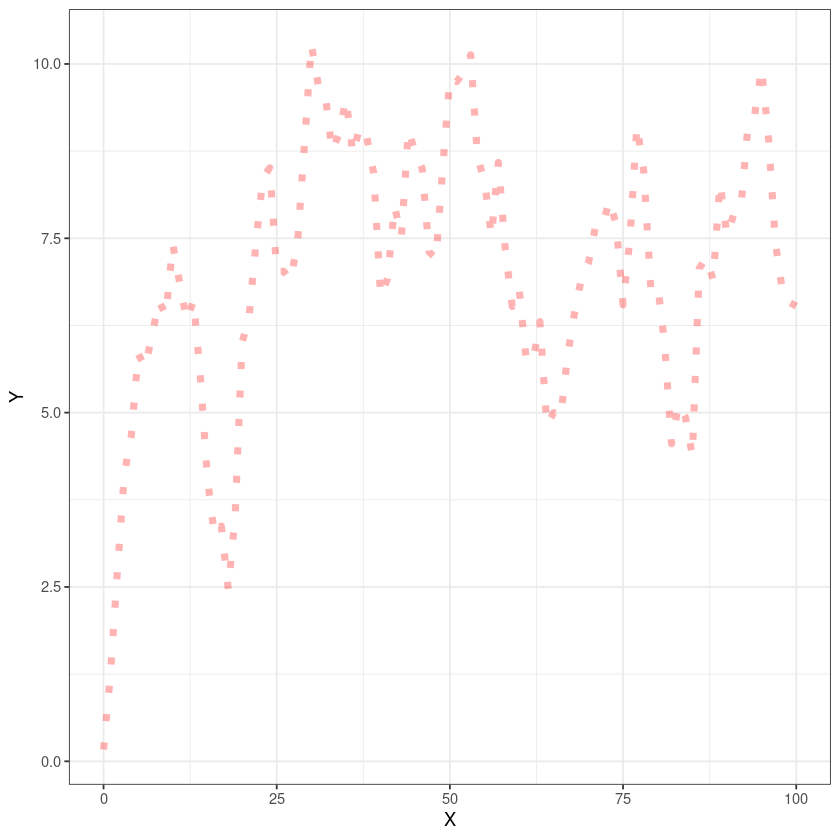

In [8]:
p2 <- p2 + theme_bw()
print(p2)

There are many __themes__ to choose from. You can find out about them [here](https://ggplot2.tidyverse.org/reference/ggtheme.html)

### <u>Exercise 4</u>

Experiment with some of the themes documented on the [__ggplot2__ website](https://ggplot2.tidyverse.org/reference/ggtheme.html) 

## Labels

It is easy to add labels to a plot


### <u>Example 5</u> - Adding Labels 

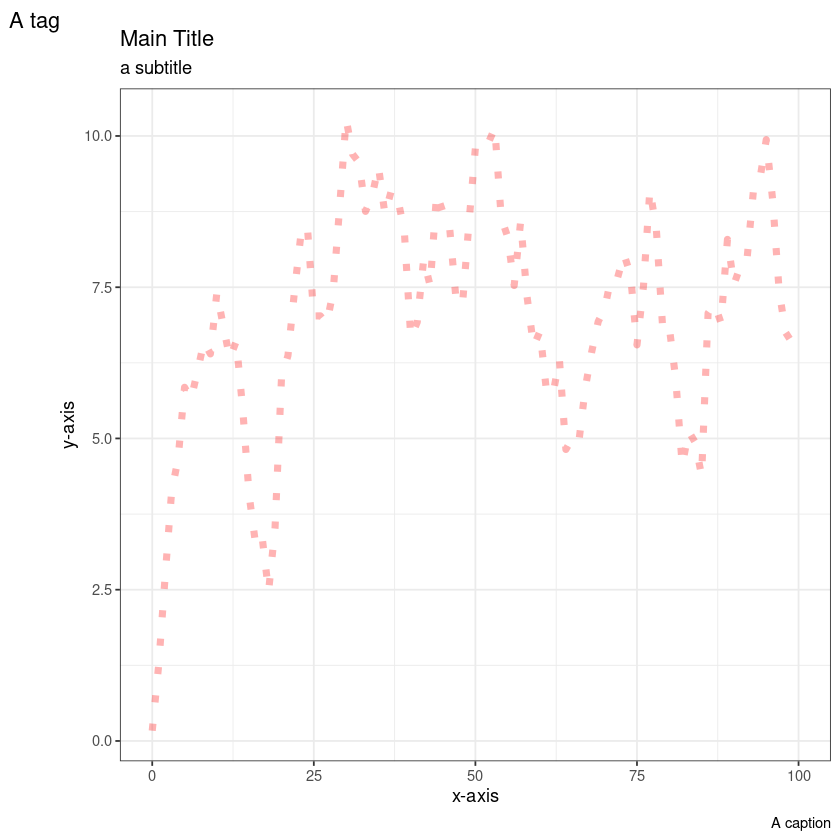

In [9]:
p2 <- p2 + labs(
    title = "Main Title",
    subtitle = "a subtitle",
    caption = "A caption",
    tag = "A tag",
    x = "x-axis",
    y = "y-axis"
  )
print(p2)

## More __aesthetics__

It is possible to add __aesthetics__ to a layer. You can think of an __aesthetic__ as a mapping between the data and
features of the layer. For example, you can make the colour change with the data.

### <u>Example 6</u> - Colour as a function of value

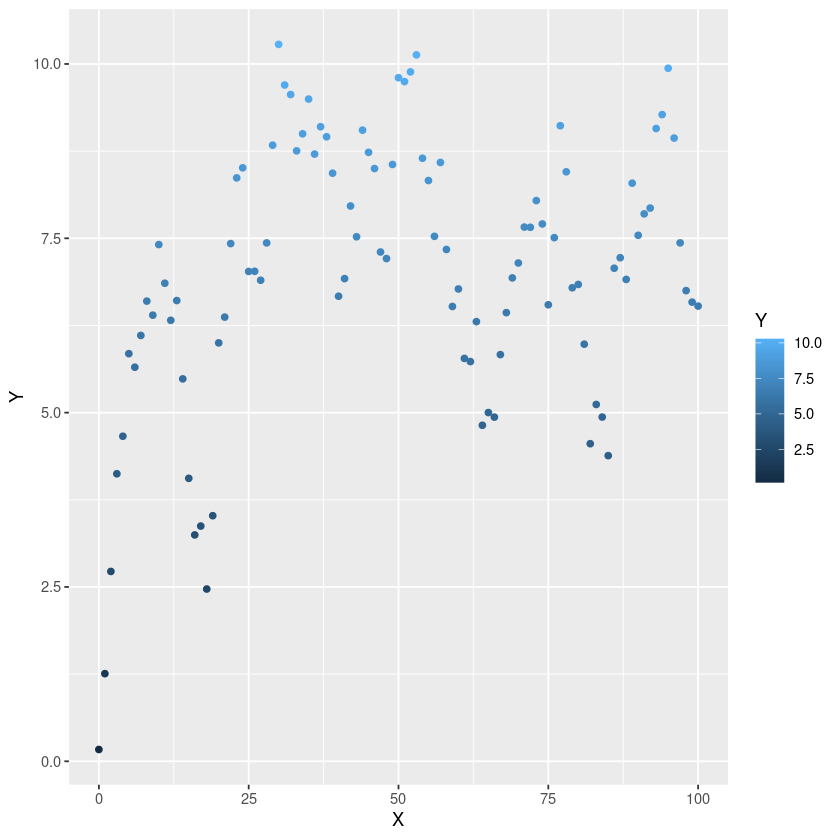

In [10]:
p3<-p + geom_point(aes(color=Y))
print(p3)

### <u>Example 7</u> - Transparency as a function of value

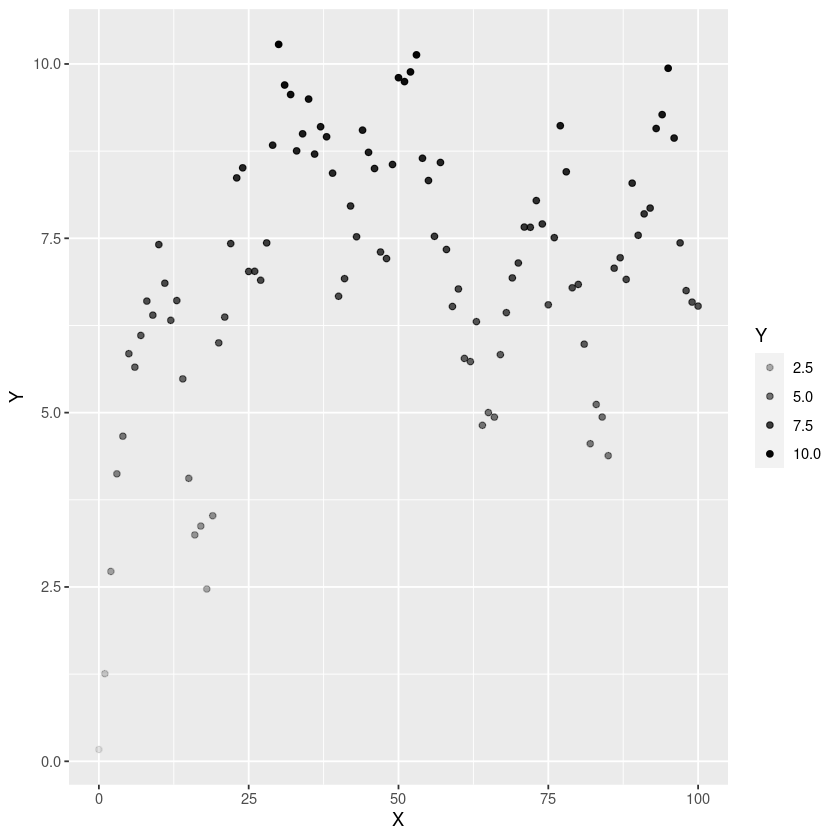

In [11]:
p3<-p + geom_point(aes(alpha=Y))
print(p3)

### <u>Example 8</u> - Smoothing the data 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



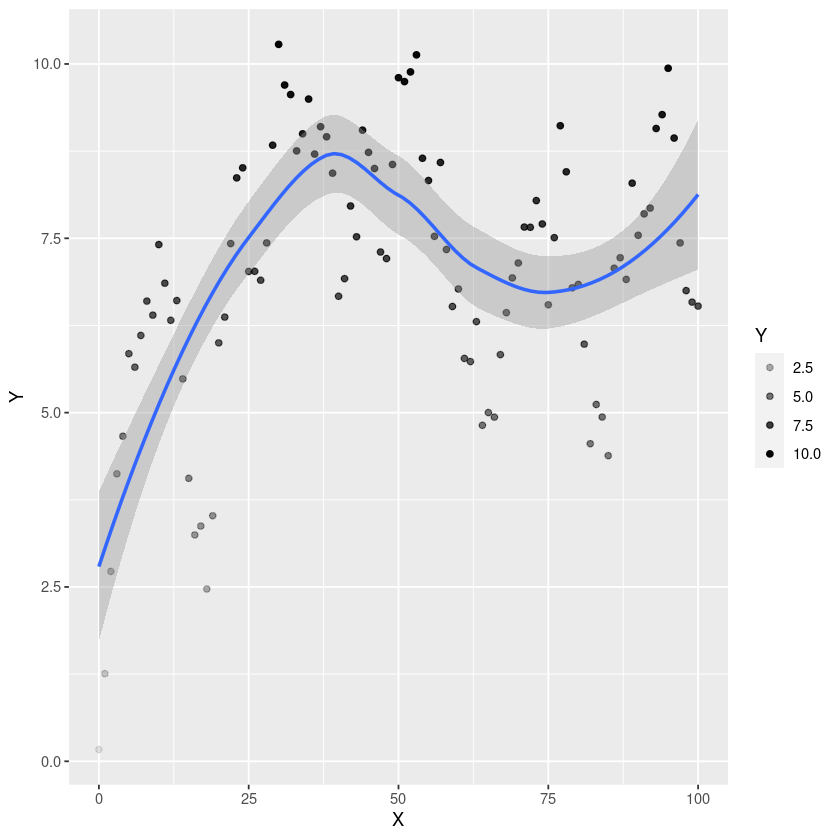

In [12]:
p3<-p + geom_point(aes(alpha=Y)) + geom_smooth()
print(p3)

## Plot types

There are lots of different plot types. A good way to find out about them is look through the some of the online galleries. A good starting point for a wide range of examples with code and data is the [R graph library](https://www.r-graph-gallery.com/). I have picked a few and added them as examples.

In [13]:
# Data
a <- data.frame( x=rnorm(20000, 10, 1.9), y=rnorm(20000, 10, 1.2) )
b <- data.frame( x=rnorm(20000, 14.5, 1.9), y=rnorm(20000, 14.5, 1.9) )
c <- data.frame( x=rnorm(20000, 9.5, 1.9), y=rnorm(20000, 15.5, 1.9) )
df <- rbind(a,b,c)
 


### <u>Example 9</u> - Simple contour plot

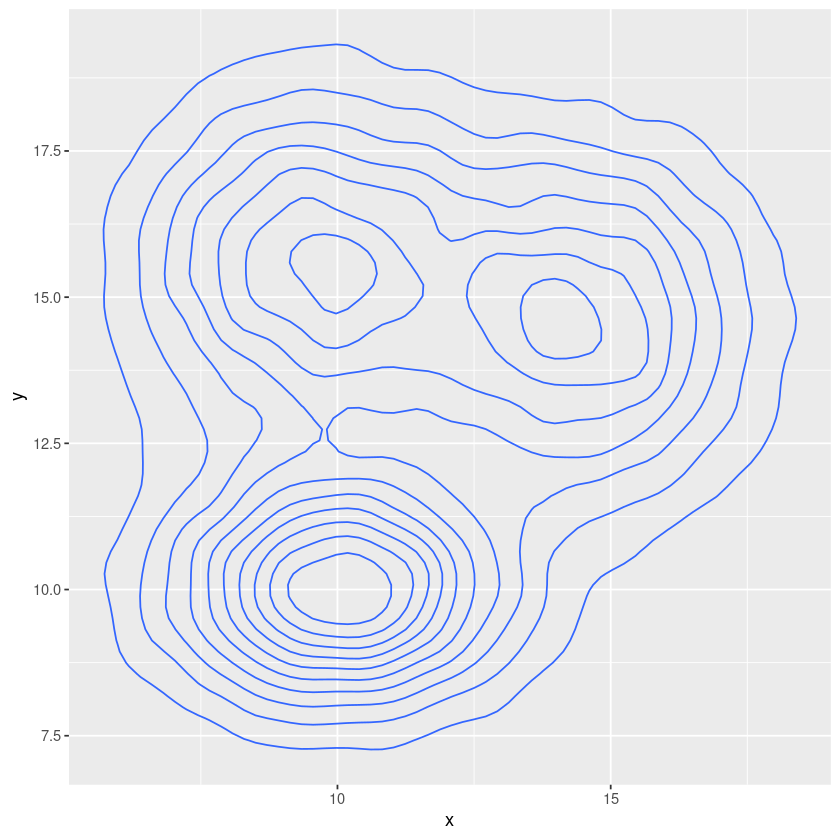

In [14]:
p <- ggplot(df, aes(x=x, y=y) )

p1 <- p + geom_density_2d()
print(p1)

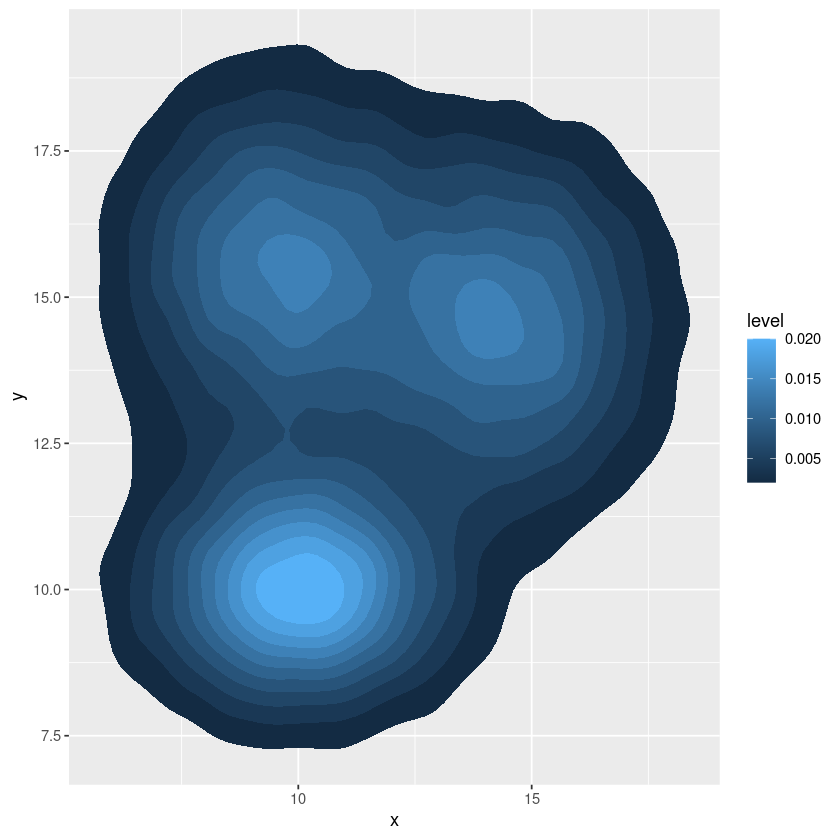

In [15]:
p2 <- p + stat_density_2d(aes(fill = ..level..), geom = "polygon")
print(p2)

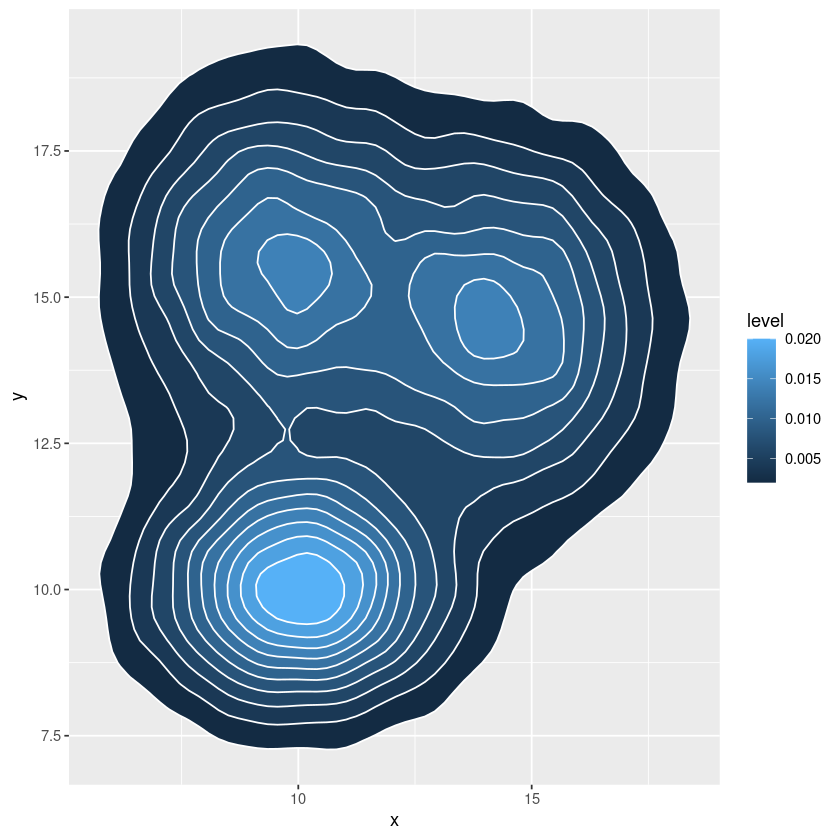

In [16]:
p3 <- p + stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white")
print(p3)

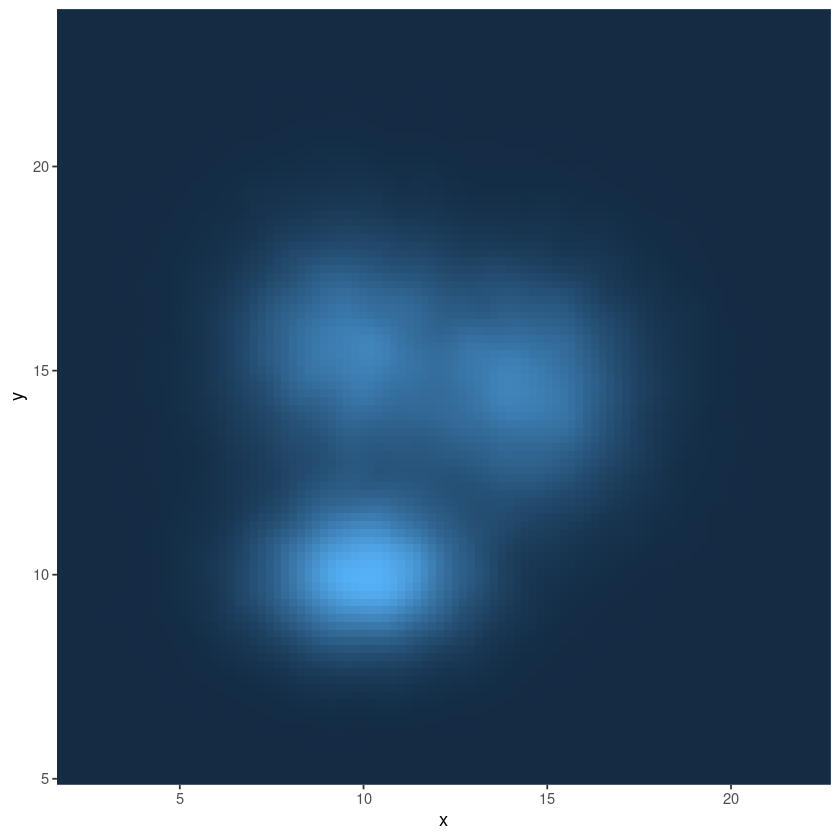

In [17]:
p4 <- p + stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  theme(
    legend.position='none'
  )
print(p4)

You can add extra data to a layer. 

### <u>Example 10</u> - Adding data to a layer

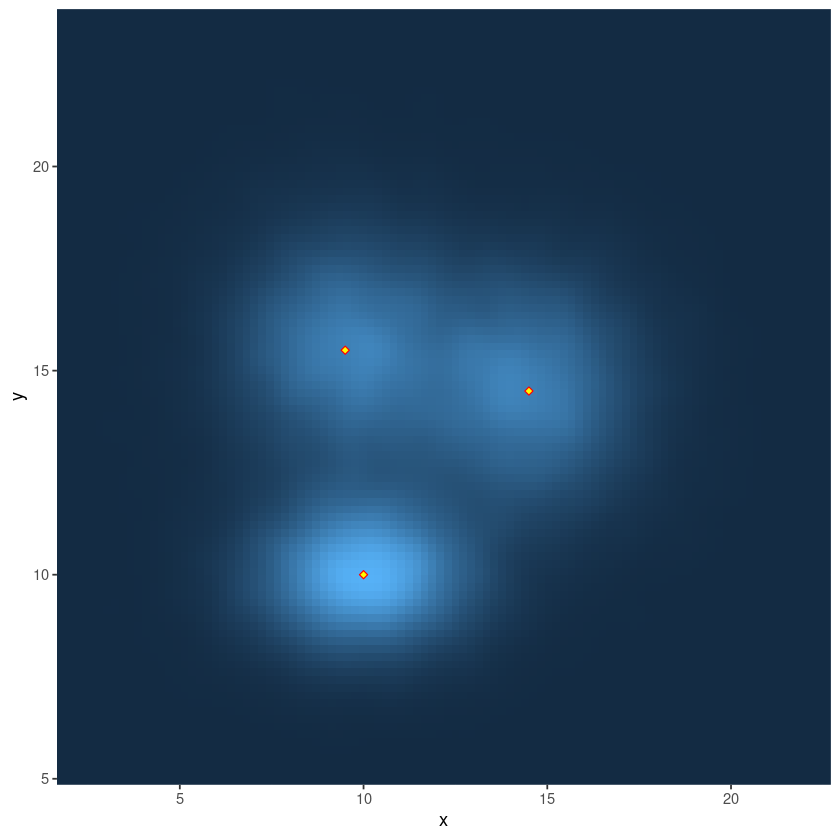

In [18]:
hotspots<-data.frame(x=c(10,14.5,9.5),y=c(10,14.5,15.5))
p4 <- p4 + geom_point(data=hotspots,aes(x=x,y=y),shape=23,fill="yellow",color="red")
plot(p4)

## Organising plots

### <u>Exercise 5</u>

Install the gridExtra package.

In [19]:
install.packages("gridExtra")

Installing package into ‘/home/grosedj/R-packages’
(as ‘lib’ is unspecified)



### <u>Example 11</u> - Putting plots together in a grid

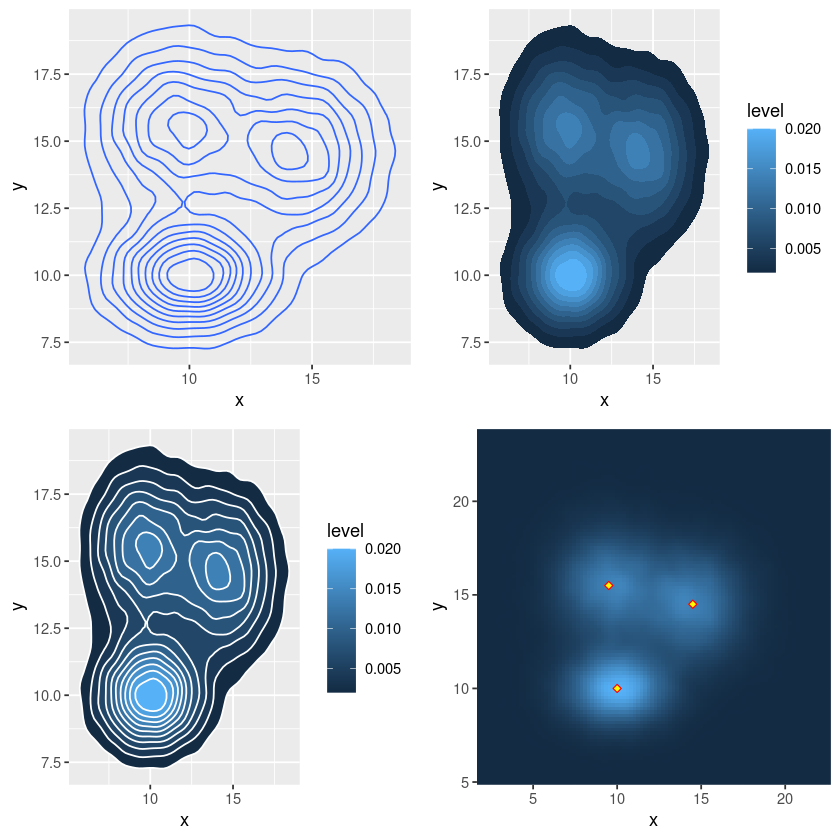

In [20]:
library(gridExtra)
grid.arrange(p1,p2,p3,p4,nrow = 2,ncol=2)

### <u>Exercise 6</u>

Find out mor details about __gridExtra__ [here](https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html) and experiment with some different plot arrangements.

## Saving plots

### <u>Example 12</u> -  Saving a plot to a pdf file.

Saving 6.67 x 6.67 in image



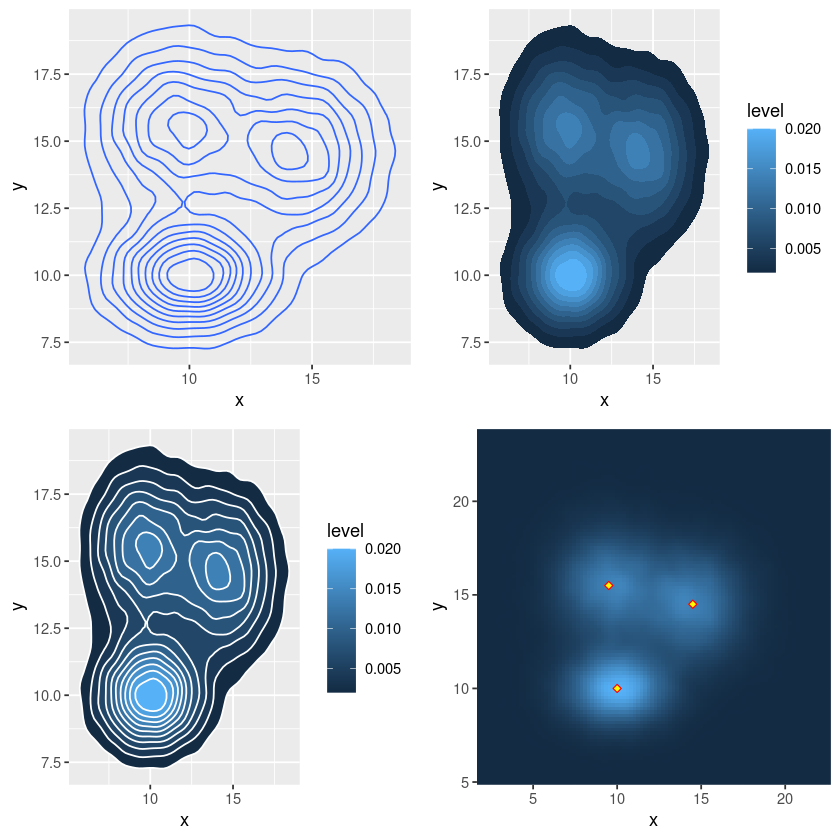

In [21]:
p5 <- grid.arrange(p1,p2,p3,p4,nrow = 2,ncol=2)
ggsave("mutiple-countor-plots.pdf",p5)

### <u>Exercise 13</u>

Use the __help__ function to find out how to save a plot using a different file format.